In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import metrics

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#loading a dataset to a panda DataFrame
car_dataset= pd.read_csv('/content/quikr_car.xlsx - Worksheet.csv')


In [ ]:
car_dataset.shape

(892, 6)

In [ ]:
car_dataset.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [ ]:
car_dataset['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [ ]:
#We can observe year has many garbage values.
#The data type of year is also object

In [ ]:
car_dataset['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [ ]:
#price has "ask for price"
#price datatype is object

In [ ]:
car_dataset['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [ ]:
#kms_driven has kms with integer
#kms_driven object to int
#kms_driven has nan value

In [ ]:
car_dataset['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [ ]:
#contains nan values
#keep first three words of name

In [ ]:
backup_dataset= car_dataset.copy()

Cleaning


In [ ]:
car_dataset['year'].str.isnumeric()

0       True
1       True
2       True
3       True
4       True
       ...  
887    False
888     True
889     True
890     True
891     True
Name: year, Length: 892, dtype: bool

In [ ]:
car_dataset=car_dataset[car_dataset['year'].str.isnumeric()]

In [ ]:
car_dataset['year']=car_dataset['year'].astype(int)

<ipython-input-21-fa7953bec6e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_dataset['year']=car_dataset['year'].astype(int)


In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


In [ ]:
car_dataset=car_dataset[car_dataset['Price']!= "Ask For Price"]

In [ ]:
car_dataset['Price']= car_dataset['Price'].str.replace(',','').astype(int)

In [ ]:
car_dataset['kms_driven']=car_dataset['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [ ]:
car_dataset=car_dataset[car_dataset['kms_driven'].str.isnumeric()]

In [ ]:
car_dataset['kms_driven']=car_dataset['kms_driven'].astype(int)

In [ ]:
car_dataset=car_dataset[~car_dataset['fuel_type'].isna()]

In [ ]:
car_dataset['name']=car_dataset['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [ ]:
car_dataset.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
car_dataset.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [ ]:
car_dataset=car_dataset[car_dataset['Price']<6e6].reset_index(drop=True)

In [ ]:
car_dataset.to_csv('cleaned_car.csv')

EDA

In [ ]:
# Classify the non-numerical features
cat_features = [x for x in car_dataset.columns if car_dataset[x].dtype == 'O']
# Classify the numerical features
num_features = [x for x in car_dataset.columns if car_dataset[x].dtype != 'O']
# Classify the discrete features
discrete_features = [x for x in num_features
                     if len(car_dataset[x].unique()) < 25]
# Classify the continuous features
continuous_features = [x for x in num_features
                      if x not in discrete_features]
# Check them out
print(f"Categorical features: {cat_features}\nNumerical features: {num_features}\
\nDiscrete features: {discrete_features}\nContinuous features: {continuous_features}")

Categorical features: ['name', 'company', 'fuel_type']
Numerical features: ['year', 'Price', 'kms_driven']
Discrete features: ['year']
Continuous features: ['Price', 'kms_driven']


<ipython-input-35-89f61c4bf23d>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  count.set_xticklabels(count.get_xticklabels(), rotation='vertical')
<ipython-input-35-89f61c4bf23d>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price = sns.barplot(x=car_dataset.groupby('company').mean()['Price'].index,y= car_dataset.groupby('company').mean()['Price'].values)
<ipython-input-35-89f61c4bf23d>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price = sns.barplot(x=car_dataset.groupby('company').mean()['Price'].index,y= car_dataset.groupby('company').mean()['Price'].values)


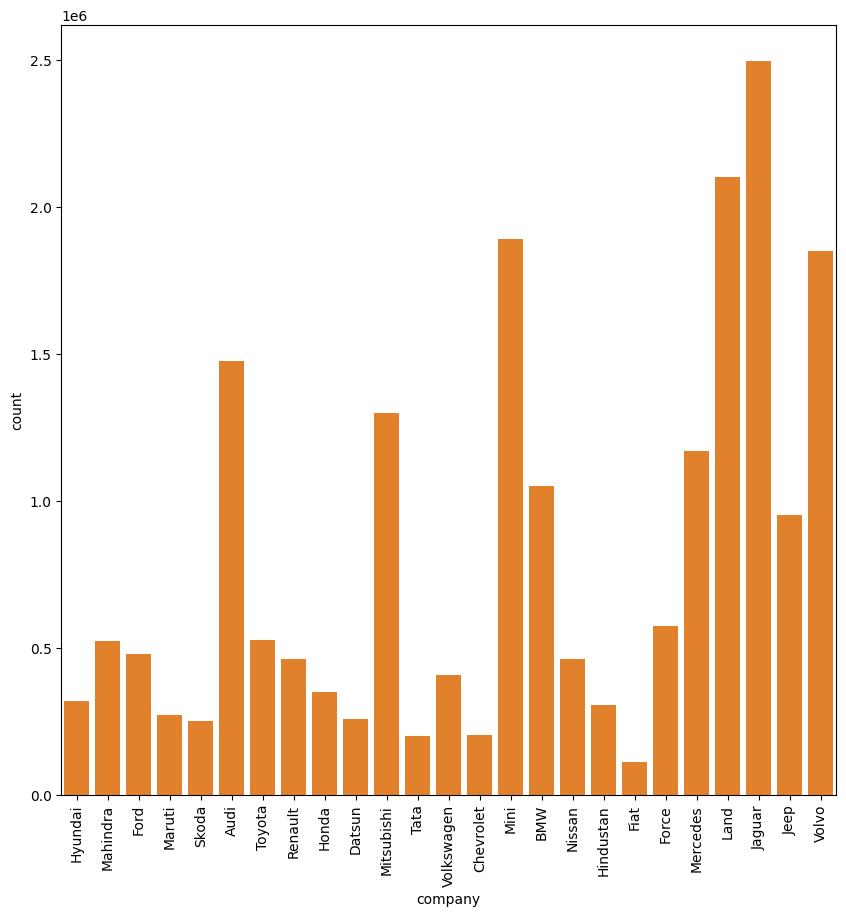

In [ ]:
# Create a figure
plt.figure(figsize=(10,10))
# Count the number of times a car was bought and plot the graph
count = sns.countplot(x=cat_features[1],data=car_dataset)
count.set_xticklabels(count.get_xticklabels(), rotation='vertical')
# Plot the mean price of each car
price = sns.barplot(x=car_dataset.groupby('company').mean()['Price'].index,y= car_dataset.groupby('company').mean()['Price'].values)
#sns.countplot(x ='name', data = car_dataset)


<ipython-input-36-afa136f417b8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(a.get_xticklabels(), rotation='vertical')
<ipython-input-36-afa136f417b8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(['1 - 4', '4 - 6', '6 - 9', '9 - 22'], rotation='vertical')
<ipython-input-36-afa136f417b8>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_xticklabels(['171 - 33965', '33966 - 53000', '53000 - 73000', '73000 - 6500000'], rotation='vertical')
<ipython-input-36-afa136f417b8>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  d.set_xticklabels(d.get_xticklabels(), rotation='vertical')


[Text(0, 0, 'Petrol'), Text(1, 0, 'Diesel'), Text(2, 0, 'LPG')]

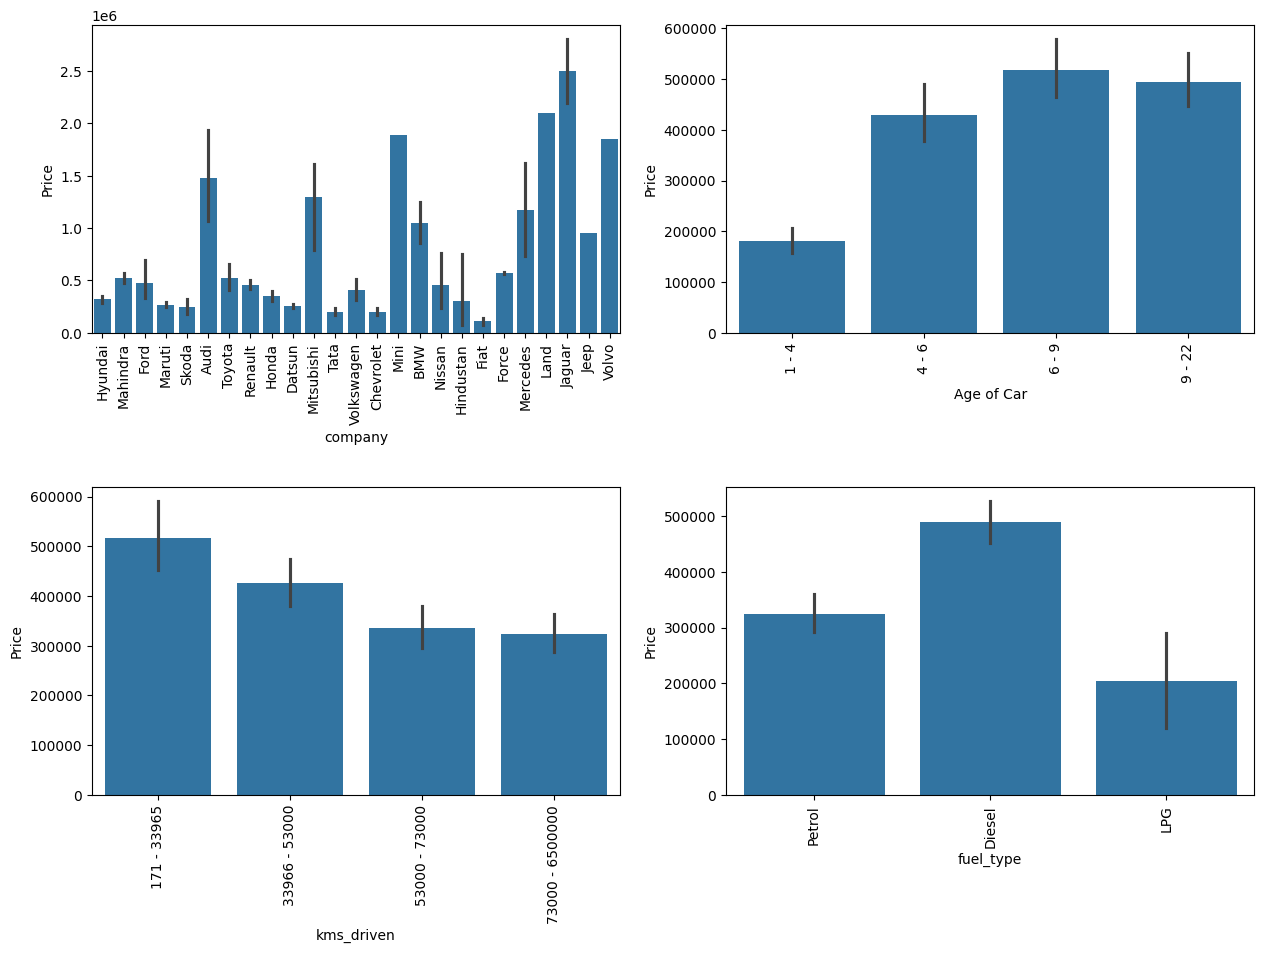

In [ ]:
# Create a figure with 4 subplots
fig, ax = plt.subplots(2,2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
# Graph each categorical feature wrt to thee Price
a = sns.barplot(x=car_dataset.columns[1], y='Price', data=car_dataset, ax=ax[0][0])
a.set_xticklabels(a.get_xticklabels(), rotation='vertical')
b = sns.barplot(x=pd.qcut(car_dataset[car_dataset.columns[2]], 4), y='Price', data=car_dataset, ax=ax[0][1])
b.set_xticklabels(['1 - 4', '4 - 6', '6 - 9', '9 - 22'], rotation='vertical')
b.set_xlabel('Age of Car')
c = sns.barplot(x=pd.qcut(car_dataset[car_dataset.columns[4]], 4), y='Price', data=car_dataset, ax=ax[1][0])
c.set_xticklabels(['171 - 33965', '33966 - 53000', '53000 - 73000', '73000 - 6500000'], rotation='vertical')
d = sns.barplot(x=car_dataset.columns[5], y='Price', data=car_dataset, ax=ax[1][1])
d.set_xticklabels(d.get_xticklabels(), rotation='vertical')

<ipython-input-37-695f6e9eb390>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_dataset.corr(), annot=True, cmap="RdBu")


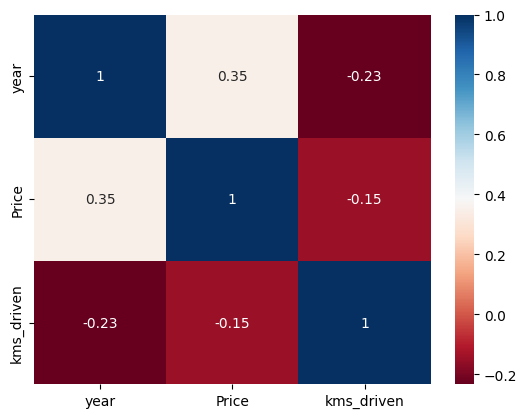

In [ ]:
sns.heatmap(car_dataset.corr(), annot=True, cmap="RdBu")
plt.show()

MODEL

In [ ]:
x=car_dataset.drop(columns='Price')
y=car_dataset['Price']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state=4)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
one_hot= OneHotEncoder()
one_hot.fit(x[['name','company','fuel_type']])
cat_fea=['name','company','fuel_type']
transformer= make_column_transformer((OneHotEncoder(categories= one_hot.categories_),cat_fea) ,

                                 remainder = "passthrough")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
model= RandomForestRegressor()
pipe= make_pipeline(transformer, model)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:

pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
y_pred=pipe.predict(X_test)
y_pred


array([ 125550.        ,  382019.94      ,  111724.95833333,
        227777.77      ,  360200.        ,  392379.99      ,
        192249.96      ,  514369.78      ,  450690.        ,
        436175.96095238,  505584.93      ,  368089.99      ,
        248519.86      ,   55729.97      ,  279189.97      ,
        437868.89      ,  111724.95833333,  676149.98      ,
        295649.49      ,  244454.40619048,  200959.98      ,
        205659.89      ,  301289.98      ,  240211.01      ,
         71523.20333333,  411109.98      ,  118444.99      ,
        305749.91      ,  294784.39      ,  823500.        ,
        276237.68      ,  212589.96      ,  471699.91      ,
        197037.35095238,  566374.99      ,  263849.83      ,
        339075.5       ,  442667.23      ,  188644.97      ,
         85740.47619048,  481607.69      ,  279649.99      ,
        832416.50793651,  776110.        ,  242121.61904762,
        318508.12666667,  350949.03      ,  118099.99      ,
       1769873.23      ,

In [ ]:
r2_score(y_test,y_pred)

0.8730927134565976

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
pipe= make_pipeline(transformer,lr)
pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred_lr= pipe.predict(X_test)
r2_score(y_test,y_pred_lr)

0.8188957905376869

In [ ]:

dt= DecisionTreeRegressor()
pipe= make_pipeline(transformer,dt)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
y_pred_dt= pipe.predict(X_test)
r2_score(y_test,y_pred_dt)

0.746683742683546

In [ ]:
rdg= Ridge()
pipe= make_pipeline(transformer,rdg)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('ridge', Ridge())])

In [ ]:
y_pred_rgd= pipe.predict(X_test)
r2_score(y_test,y_pred_rgd)

0.08756748085736898

In [ ]:
n_estimators=[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features=  ['auto', 'sqrt']
max_depth=[int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
bootstrap=[True,False]
min_samples_split=[2, 3, 5]
min_samples_leaf=[1, 2, 3]

param_random={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'bootstrap': bootstrap,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf
            }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_random= RandomizedSearchCV(estimator=model,
                            param_distributions= param_random,

                            cv=5,
                            verbose=2,
                            n_jobs= -1)

In [ ]:
pipe= make_pipeline(transformer, rf_random)

In [ ]:
pipe.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                   'fuel_type'])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                                    n_jobs=-1,
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_depth': [5, 10,
                                                                       15, 20,
                                                                       25, 30,
                                                                       35, 40,
                                                                       45, 50,
                                                                       None],
                                                         'max_features': ['auto',
                                                                          'sqrt'],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              3],
                                                         'min_samples_split': [2,
                                                                               3,
                                                                               5],
                                                         'n_estimators': [200,
                                                                          400,
                                                                          600,
                                                                          800,
                                                                          1000,
                                                                          1200,
                                                                          1400,
                                                                          1600,
                                                                          1800,
                                                                          2000]},
                                    verbose=2))])

In [ ]:
best_parameters= rf_random.best_params_

In [ ]:
best_parameters

{'n_estimators': 800,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
model= RandomForestRegressor(n_estimators= 1600,
    min_samples_split = 5,
    min_samples_leaf= 1,
    max_features = 'sqrt',
    max_depth = 30,
    bootstrap = False)

pipe= make_pipeline(transformer, model)

In [ ]:
pipe.fit(X_train,y_train)
y_pred_RSCV=pipe.predict(X_test)
r2_score(y_test,y_pred_RSCV)

0.8768242943840827

In [ ]:
import pickle
pickle.dump(pipe,open('CarPricePredictionModel.pkl','wb'))

In [ ]:
car_dataset['name'].unique()

array(['Hyundai Santro Xing', 'Mahindra Jeep CL550', 'Hyundai Grand i10',
       'Ford EcoSport Titanium', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente', 'Maruti Suzuki Alto',
       'Skoda Fabia Classic', 'Maruti Suzuki Stingray',
       'Hyundai Elite i20', 'Mahindra Scorpio SLE', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Hyundai i20 Sportz',
       'Maruti Suzuki Vitara', 'Mahindra Bolero DI',
       'Maruti Suzuki Swift', 'Maruti Suzuki Wagon', 'Toyota Innova 2.0',
       'Renault Lodgy 85', 'Skoda Yeti Ambition', 'Maruti Suzuki Baleno',
       'Renault Duster 110', 'Renault Duster 85', 'Honda City 1.5',
       'Maruti Suzuki Dzire', 'Honda Amaze', 'Honda Amaze 1.5',
       'Honda City', 'Datsun Redi GO', 'Maruti Suzuki SX4',
       'Mitsubishi Pajero Sport', 'Honda City ZX', 'Tata Indigo eCS',
       'Volkswagen Polo Highline', 'Chevrolet Spark LS',
       'Renault Duster 110PS', 'Mini Cooper S', 'Skoda Fabia 1.2L',
       'Renault Duster', 'Mahindra Scor

In [ ]:
pipe.predict(pd.DataFrame([['Audi A4 1.8','Audi',2023,50,'Petrol',]],columns= ['name','company','year','kms_driven','fuel_type']))

array([1187798.69914121])